Following topics will be covered:
* Present value of one future cash flow and the present value of perpetuity
* Present value of growing perpetuity
* Present and future value of annuity
* Perpetuity versus perpetuity due, annuity versus annuity due
* Definition of NPV and NPV rule
* Definition of IRR and IRR rule
* Python graphical presentation of time value of money, and NPV profile
* Definition of payback period and payback period rule
* How to write our own financial calculator using Python

### Introduction to time value of money

Assume that `$100` is deposited in a bank
today with an annual interest rate of 10%. What is the value of the deposit one year
later? Here is the timeline with the dates and cash flows:

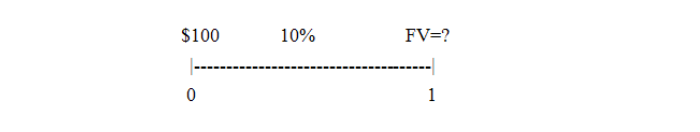

Obviously, our annual interest payment will be $10, that is, 100*0.1=10. Thus, the
total value will be 110, that is, 100 + 10. The original `$100` is principal. Alternatively,
we have the following result:


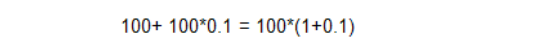

Assume that `$100` will be kept in the bank for two years with the same `10%` annual
interest rate for two years. What will be the future value at the end of year two?

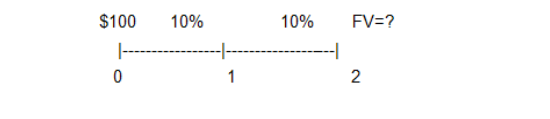

Since at the end of the first year, we have `$110` and by applying the same logic, the
future value at the end of year two should be:

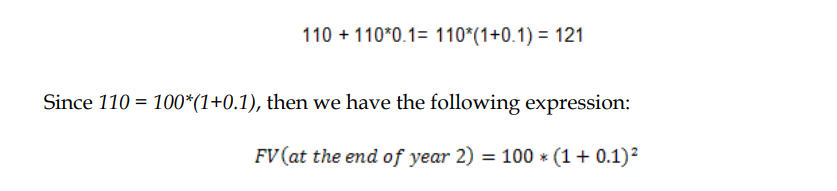

If `$100` is deposited for five years with an annual interest rate of 10%, what is the
future value at the end of year five? Based on the preceding logic, we could have the
following formula:

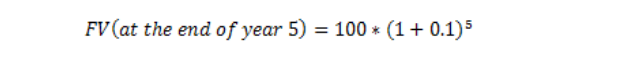

Generalization leads to our first formula to estimate the future value for one given
present value:

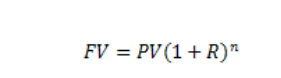

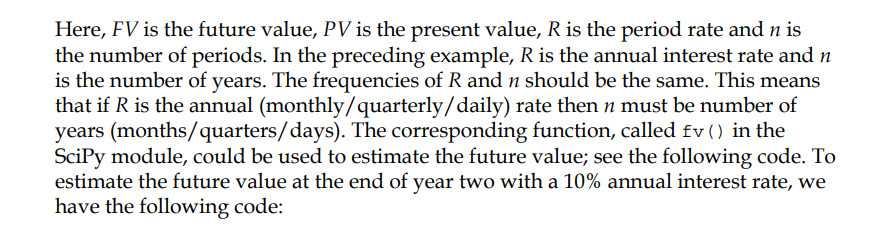

In [1]:
# import scipy as sp 
# sp.fv(0.1,2,0,100) # sp.fv is deprecated

# import numpy as np

# np.fv(0.1,2,0,100) # deprecated

In [2]:
# ! pip install numpy_financial

In [3]:
import numpy_financial as npf

fv = npf.fv(0.1,2,0,100)
fv 

-121.00000000000001

For the function, the input format is `npf.fv(rate,nper,pmt,pv=0,when='end')`.
At the moment, just ignore the last variable called `when`. There is
no `pmt` (payment per period), thus the third input should be zero. 

Pay attention to the negative
sign of the above result. The reason is that `npf.fv()` function follows the Excel
sign convention: 
* a positive future value leads to a negative present value, and vice versa. 

To find more information about this function, we type `help(npf.fv)`

In [4]:
help(npf.fv)

Help on function fv in module numpy_financial._financial:

fv(rate, nper, pmt, pv, when='end')
    Compute the future value.
    
    Given:
     * a present value, `pv`
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * a (fixed) payment, `pmt`, paid either
     * at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the value at the end of the `nper` periods
    
    Parameters
    ----------
    rate : scalar or array_like of shape(M, )
        Rate of interest as decimal (not per cent) per period
    nper : scalar or array_like of shape(M, )
        Number of compounding periods
    pmt : scalar or array_like of shape(M, )
        Payment
    pv : scalar or array_like of shape(M, )
        Present value
    when : {{'begin', 1}, {'end', 0}}, {string, int}, optional
        When payments are due ('begin' (1) or 'end' (0)).
        Defaults to {'end', 0}.
    
   

If we instead use `npf.fv(0.1,2,100,0)`, its corresponds to the
present value of two equal `$100` occur at the end of the first and second years. 

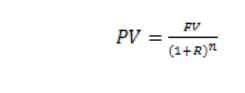

In [5]:
pv = npf.fv(0.1,2,100,0)
pv

-210.0000000000002

In [6]:
200*1.05

210.0

If we
plan to have `$234` at the end of year five and the interest rate is `1.45%` per year, how
much we have to deposit today? 

In [7]:
pv = 234/(1+0.0145)**5
pv 

217.74871488824184

In [8]:
pv = npf.pv(0.0145,5,0,234)
pv

-217.74871488824184

To find out more information we use `help(sp.pv)`

In [9]:
help(npf.pv)

Help on function pv in module numpy_financial._financial:

pv(rate, nper, pmt, fv=0, when='end')
    Compute the present value.
    
    Given:
     * a future value, `fv`
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * a (fixed) payment, `pmt`, paid either
     * at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the value now
    
    Parameters
    ----------
    rate : array_like
        Rate of interest (per period)
    nper : array_like
        Number of compounding periods
    pmt : array_like
        Payment
    fv : array_like, optional
        Future value
    when : {{'begin', 1}, {'end', 0}}, {string, int}, optional
        When payments are due ('begin' (1) or 'end' (0))
    
    Returns
    -------
    out : ndarray, float
        Present value of a series of payments or investments.
    
    Notes
    -----
    The present value is computed by s

Note that for the fourth input variable of a set of inputs, the `npf.fv()` and `npf.pv()` functions behave differently: 
* `npf.fv(0.1,1,100)` would give us an error message while 
* `npf.pv(0.1,1,100)` would work perfectly. 

The reason is that the default value of the fourth input variable in `npf.pv()` function is zero while there is no default value for the fourth input variable in the `npf.fv()` function. This is
one type of inconsistency in terms of Python programming.

In finance, it is well known that `$100` received today is more valuable than `$100`
received one year later, which in turn is more valuable than `$100` received in year
two. If different sizes are used to represent relative values, we will get the following
figure. 

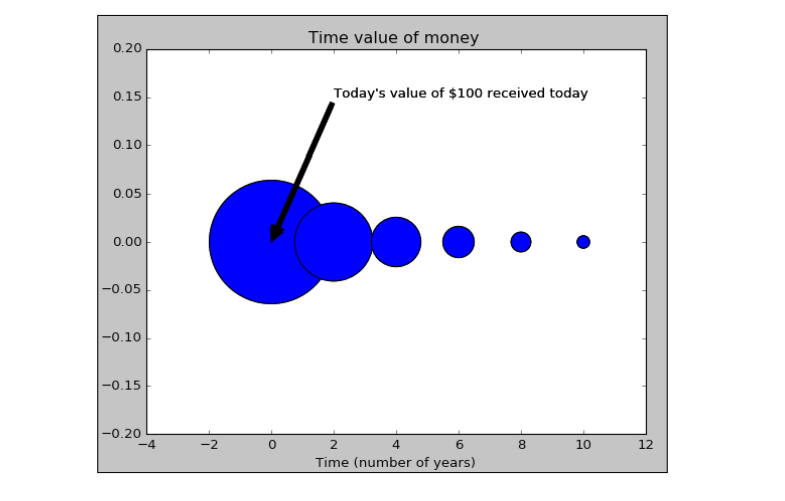

The first blue circle is the present value of `$100` today, while the second one is
the present value of `$100` at the end of the first year and so on. The Python program
to generate such an image is given in Appendix B

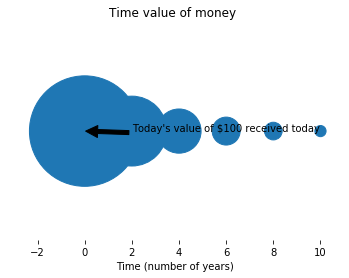

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='white')

ax1 = plt.axes(frameon=False) # or ax1.set_frame_on(False). It will set spines to False
# ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().set_visible(False) # or ax1.axes.get_yaxis().set_visible(False)
ax1.set_xticks([-4., -2,  0.,  2.,  4.,  6.,  8., 10., 12.])

name="Today's value of $100 received today"
plt.annotate(name,xy=(0,0),xytext=(2,0.001),arrowprops=dict(facecolor='black',shrink=0.02))
plt.title("Time value of money ")
plt.xlabel("Time (number of years)")

x=range(0,11,2)
x1=range(len(x),0,-1)
y = [0]*len(x)
s = [50*2.5**n for n in x1]
plt.scatter(x,y,s=s);
plt.show()

###  perpetuity

The next concept is perpetuity, which is defined as the **same constant cash flows, at the
same intervals forever**. Here is the timeline and those constant cash flows:

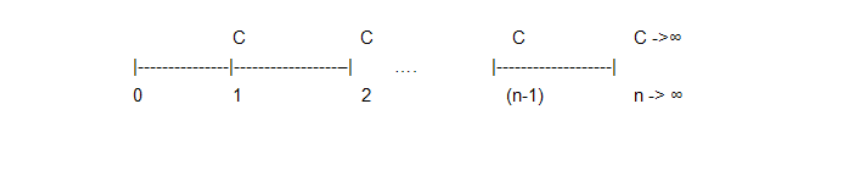

What is the present value of such perpetuity when the period discount
rate is R?

The summation of all those present values will be the solution:

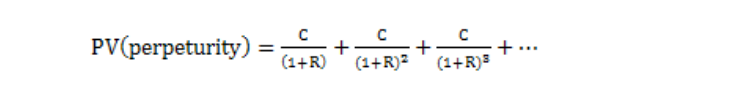

To make our derivation simpler, `PV(Perpetuity)` is replaced by `PV`

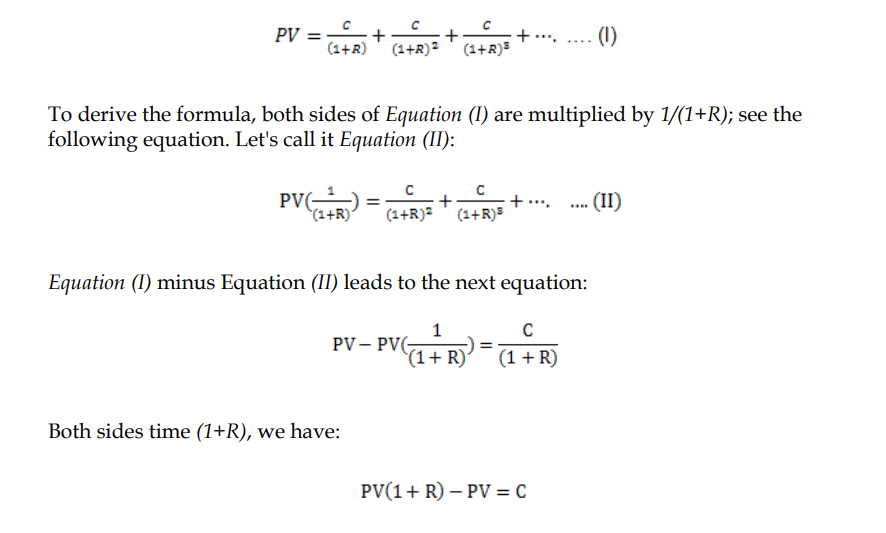

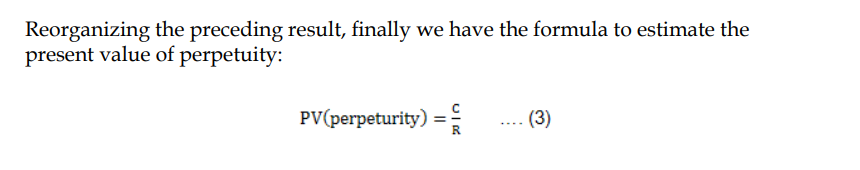

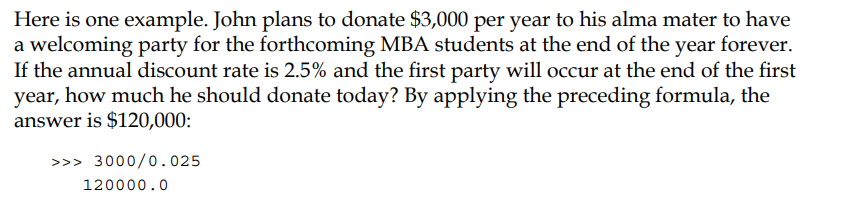

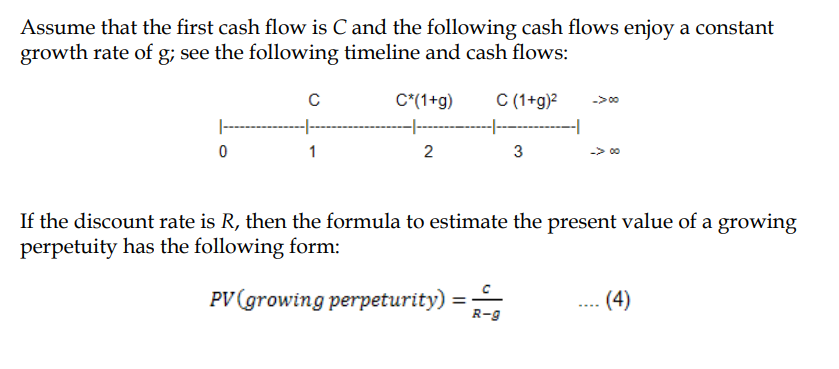

Assume that the annual inflation
is `1%`, how much does he have to denote today? The amount needed each year is
shown here:

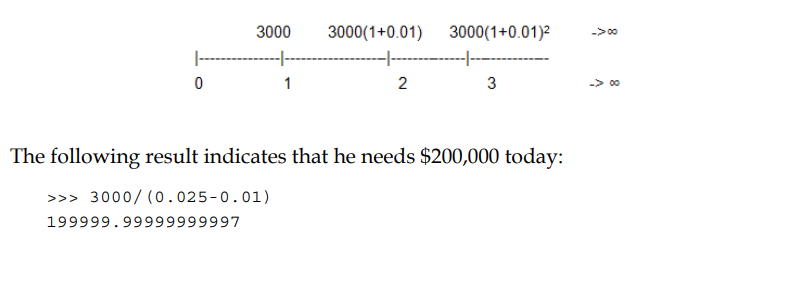

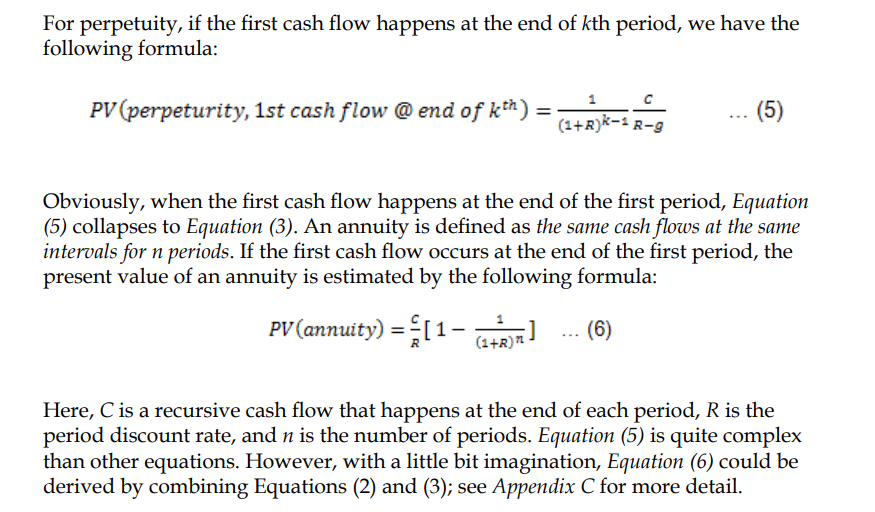

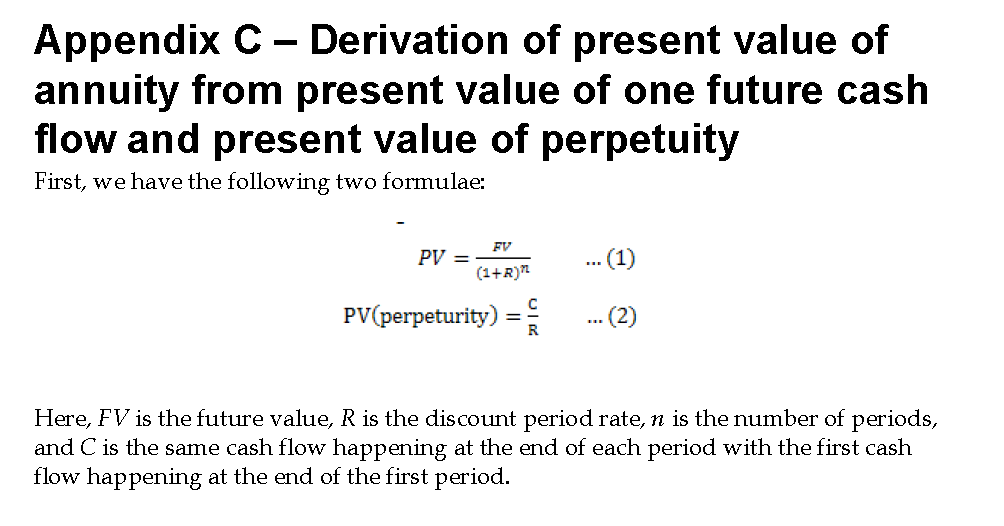

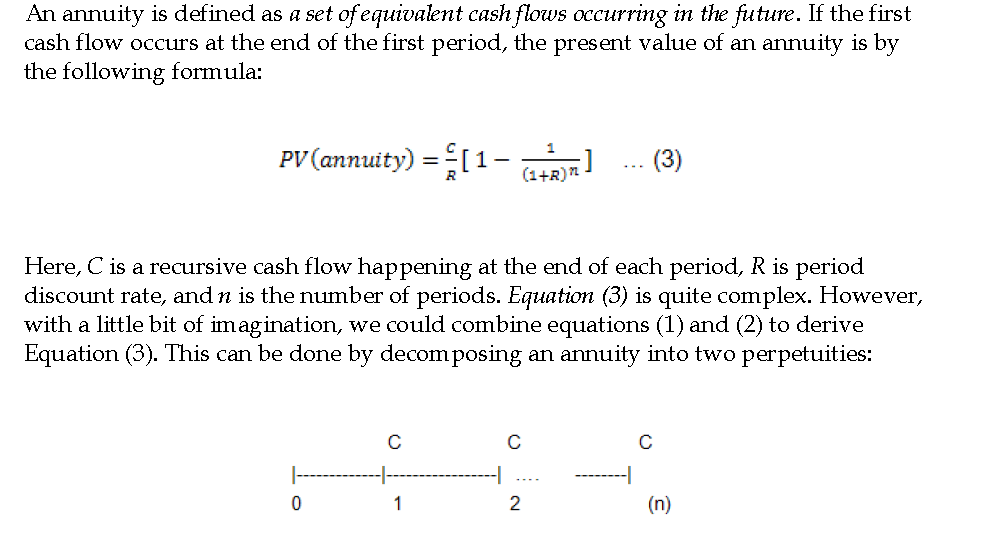

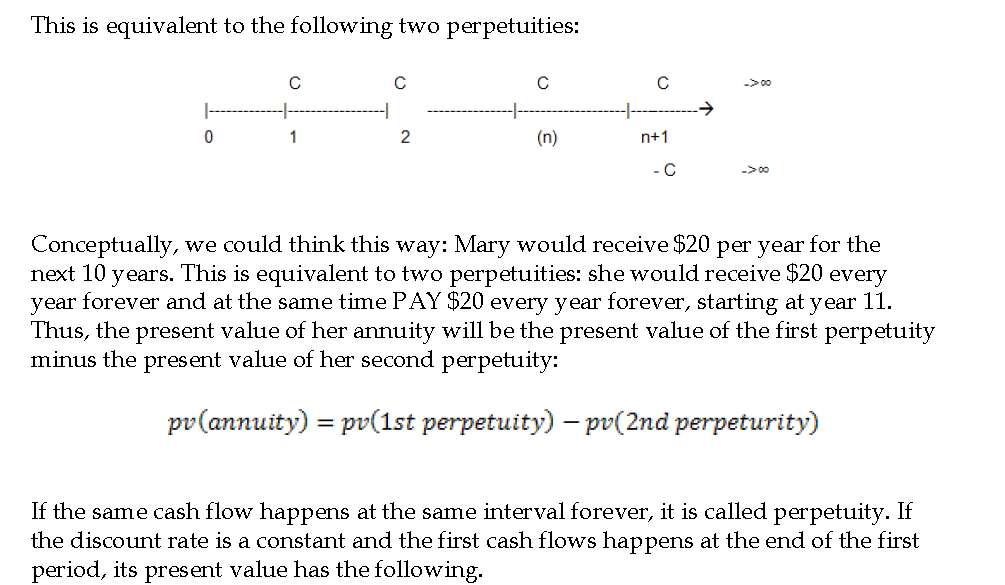

$$END->OF->APPENDIX->C$$

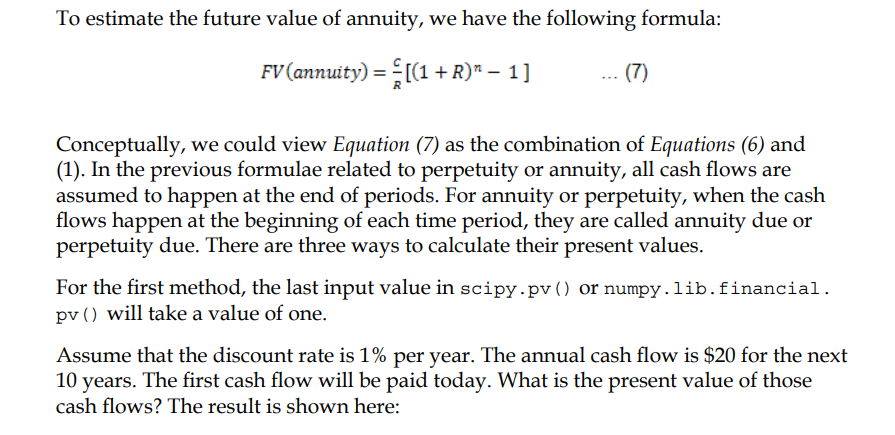

In [12]:
# import numpy.lib.financial as fin -> Depricated
import numpy_financial as fin
fin.pv(0.01,10,20,0,1)

-191.32035152017377

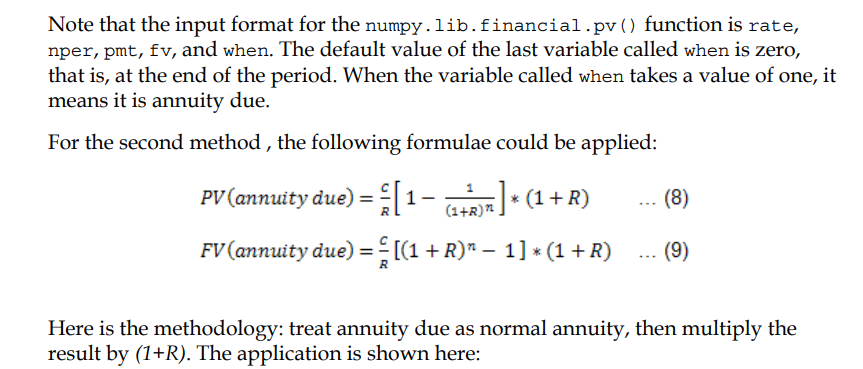

In [13]:
fin.pv(0.01,10,20,0)*(1+0.01)

-191.3203515201738

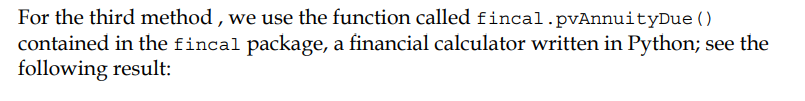

In [31]:
import fincal # fincal.py available in current directory

In [15]:
help(fincal.pvAnnuityDue)

Help on function pvAnnuityDue in module fincal:

pvAnnuityDue(c, r, n)



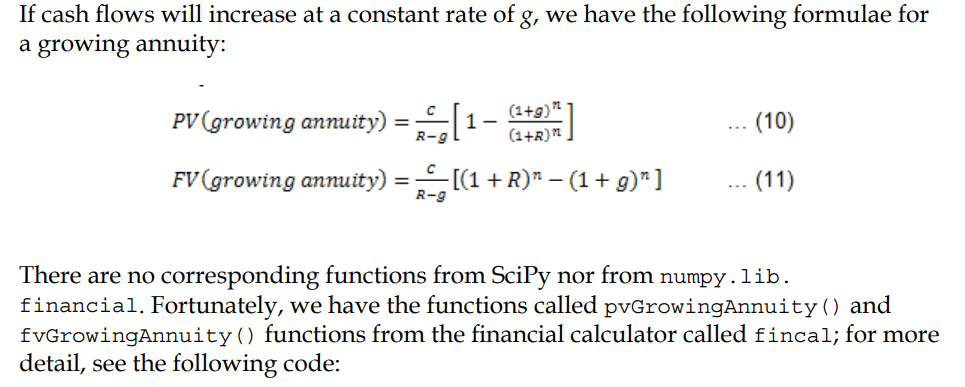

In [16]:
fincal.pvGrowingAnnuity(0.1,10,20,0.03)

137.6748738255546

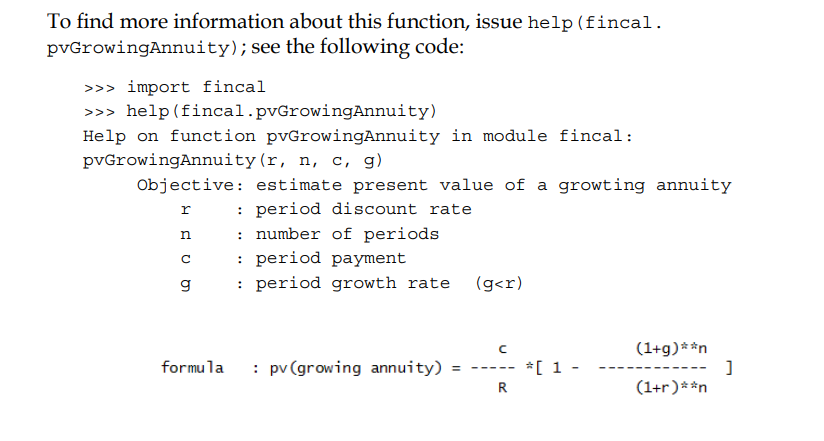

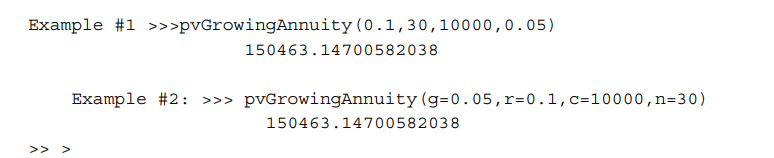

### Writing a financial calculator in Python

When discussing the various concepts of the time value of money, learners need a
financial calculator or Excel to solve various related problems.

From the preceding illustrations, it is clear that several functions, such as `scipy.pv()`, could be used to estimate the present value of one future cash flow or present value of annuity. Actually, the functions related to finance contained in the SciPy
module came from the `numpy.lib.financial` submodule:

In [20]:
# import numpy.lib.financial as fin -> deprecated
import numpy_financial as fin 
print(dir(fin))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_financial', 'fv', 'ipmt', 'irr', 'mirr', 'nper', 'npv', 'pmt', 'ppmt', 'pv', 'rate']


In [21]:
# Below are a few examples

fin.pv(0.1,3,0,100) # pv of one future cash flow
fin.pv(0.1,5,100) # pv of annuity
fin.pv(0.1,3,100,100) # pv of annuity plus pv of one fv

-323.8166791885802

First, we import two modules related to various finance functions.

* `import scipy as sp`
* `import numpy_financial as fin`

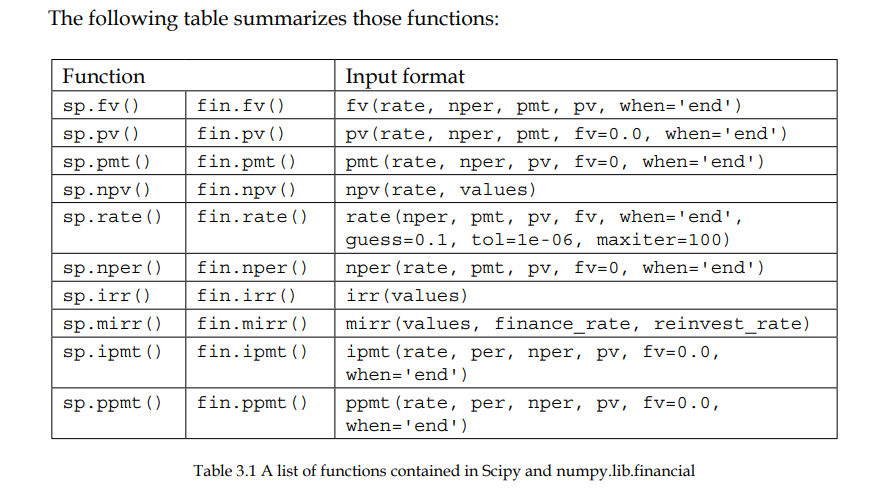

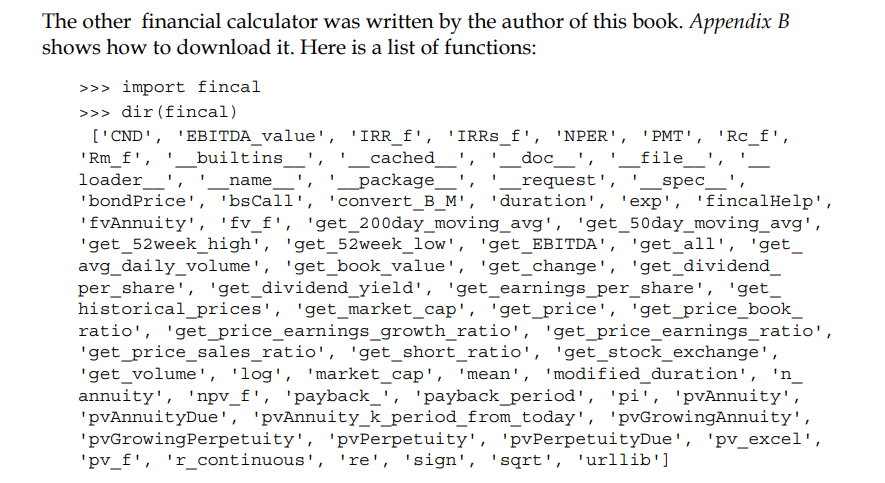

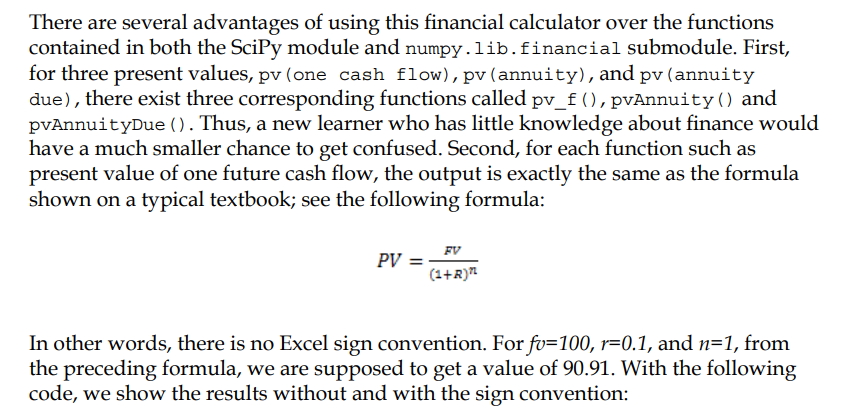

In [1]:
import fincal
fincal.pv_f(0.1,100)

90.9090909090909

In [4]:
# import scipy as sp -> Depricated
import numpy_financial as np
np.pv(0.1,1,0,100)

-90.9090909090909

Third, for each function contained in fincal, we could find out which formula is
used plus a few examples:

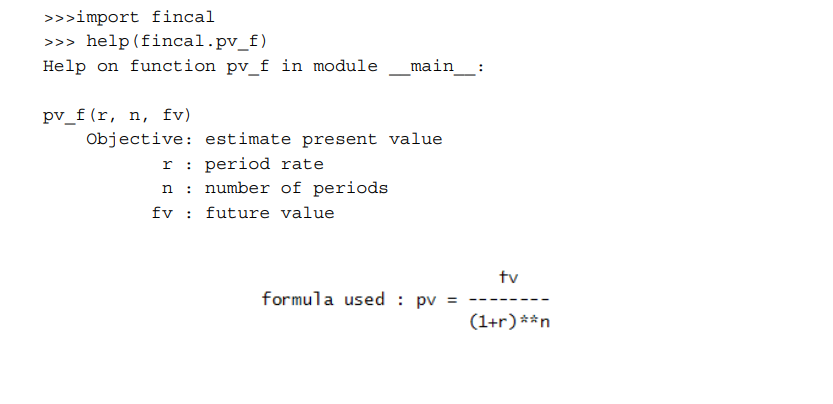

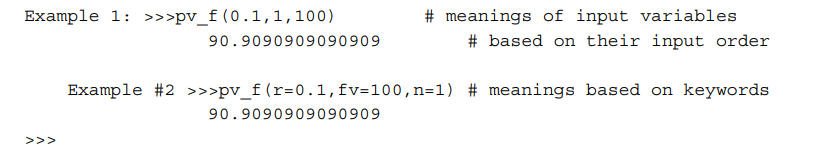

Last but not least, a new learner could write his/her own financial calculator! For
more detail, see the **Writing your own financial calculator written in Python** section and
Appendix H.

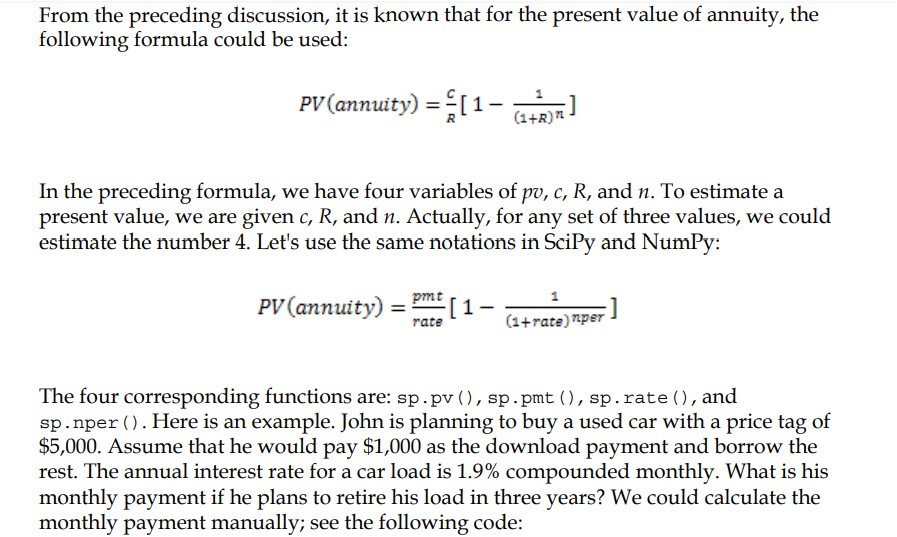

In [5]:
r=0.019/12
pv=4000
n=3*12

pv*r/(1-1/(1+r)**n)

114.39577546409993

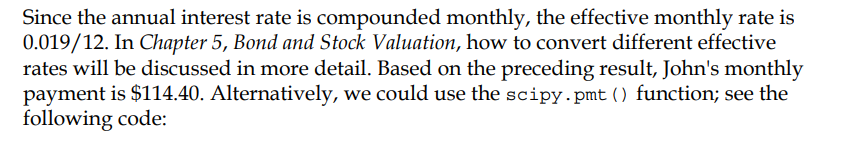

In [6]:
import scipy as sp
sp.pmt(0.019/12,3*12,4000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.pmt is deprecated and will be removed in SciPy 2.0.0, use numpy.pmt instead
  


-114.39577546409993

Similarly, for the rate in the preceding function, the `scipy.rate()` and `numpy.lib.rate()` functions could be applied. Here is one example. A company plans to lease a limousine for its CEO. If the monthly payment is `$2,000` for the next three years and the present value of the car is `$50,000`, what is the implied annual rate?

In [7]:
r=sp.rate(3*12,2000,-50000,0) # monthly effective rate
r

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.rate is deprecated and will be removed in SciPy 2.0.0, use numpy.rate instead
  """Entry point for launching an IPython kernel.


0.021211141641636025

In [8]:
r*12 # annual percentage rate

0.2545336996996323

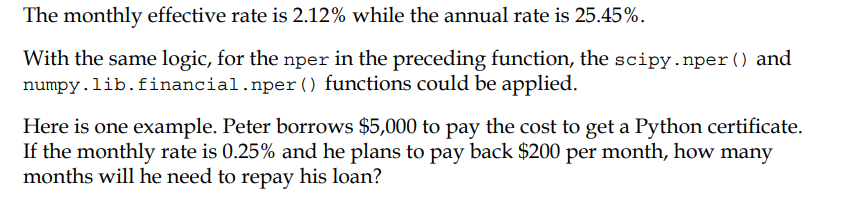

In [9]:
sp.nper(0.012,200,-5000,0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.nper is deprecated and will be removed in SciPy 2.0.0, use numpy.nper instead
  """Entry point for launching an IPython kernel.


array(29.90089492)

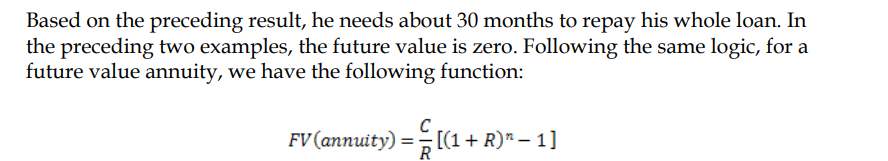

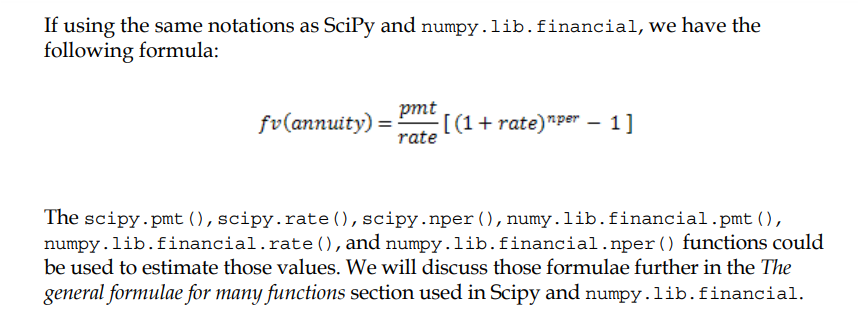

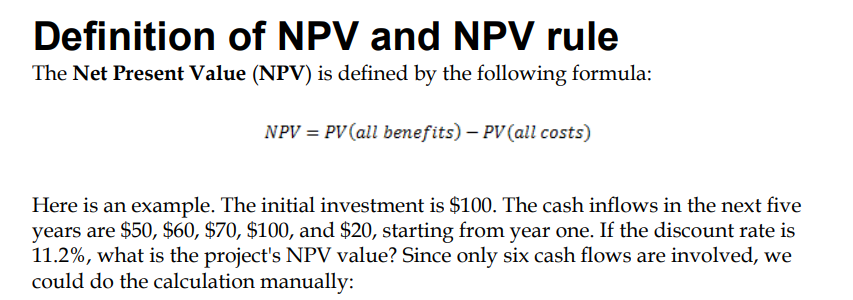

In [10]:
r=0.112
-100+50/(1+r)+60/(1+r)**2+70/(1+r)**3+100/(1+r)**4+20/(1+r)**5

121.55722687966407

Using the `scipy.npv()` function, the estimation process could be
simplified dramatically:

In [11]:
cashflows=[-100,50,60,70,100,20]
sp.npv(0.112,cashflows)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  


121.55722687966407

Based on the preceding result, the **NPV** of this project is `$121.56`. A normal project is
defined as follows: 
* cash outflows first, then cash inflows. 

Anything else is an abnormal project. For a normal project, its **NPV is negatively correlated with the discount rate**;see the following graph. 


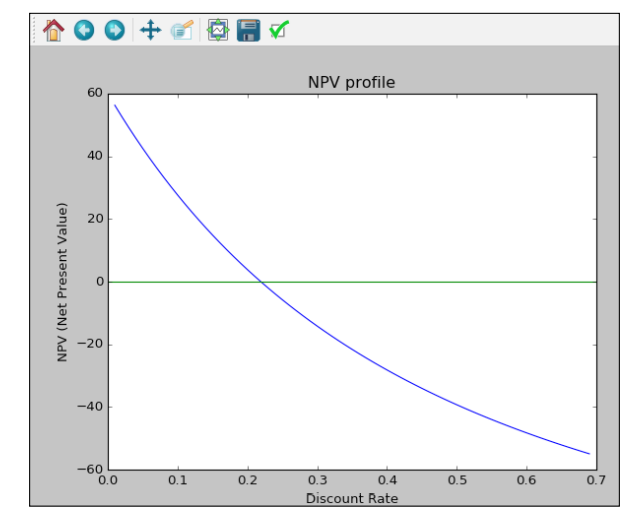

The reason is that when the discount rate increases, the present value of the future cash flows (most of times benefits) will decrease more than the current or the earliest cash flows (most of times costs). The NPV profile describes the relationship between NPV and discount rate as shown in above graph.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  # This is added back by InteractiveShellApp.init_path()


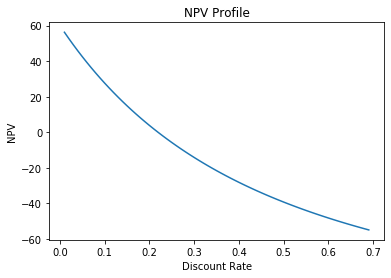

In [15]:
# Generate above Graph

import matplotlib.pyplot as plt

cashflows=[-120,50,60,70]
rate=[]
npv =[]

for i in range(1,70):
    rate.append(0.01*i)
    npv.append(sp.npv(0.01*i,cashflows))

plt.plot(rate,npv)
plt.title("NPV Profile")
plt.xlabel("Discount Rate")
plt.ylabel("NPV")
plt.show()

To estimate the NPV of a project, we could call the `npv()` function contained either
in `SciPy` or `numpy.lib.financial`; 

In [16]:
cashflows=[-100,50,60,70]
rate=0.1
npv=sp.npv(rate,cashflows)
round(npv,2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  This is separate from the ipykernel package so we can avoid doing imports until


47.63

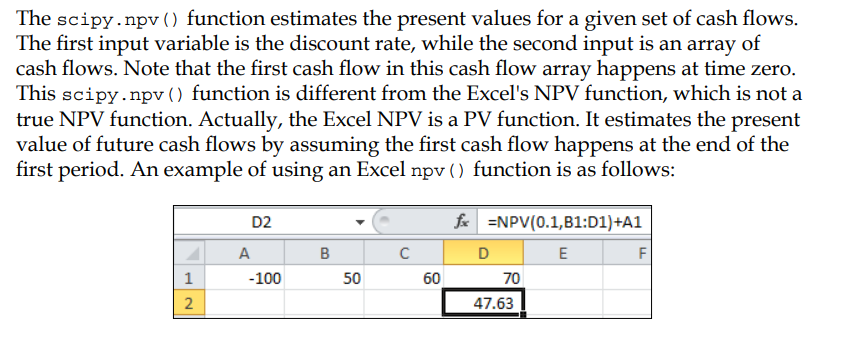

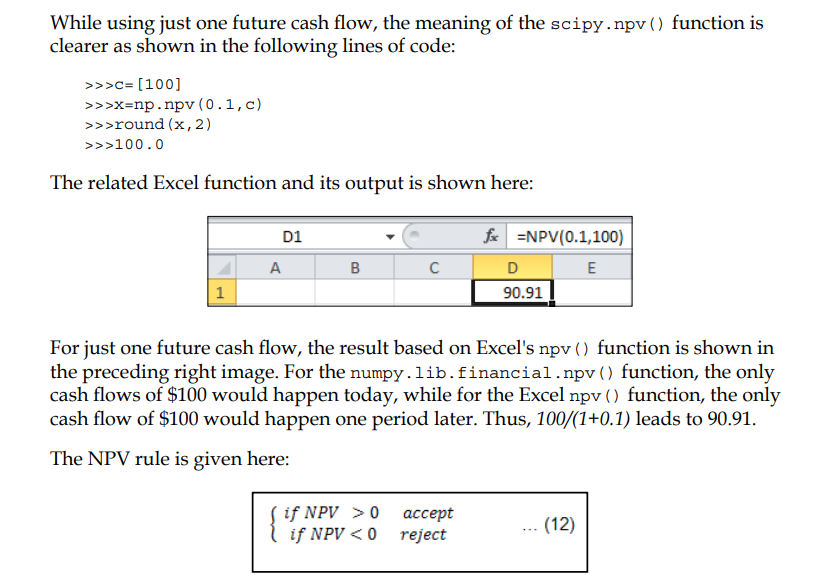

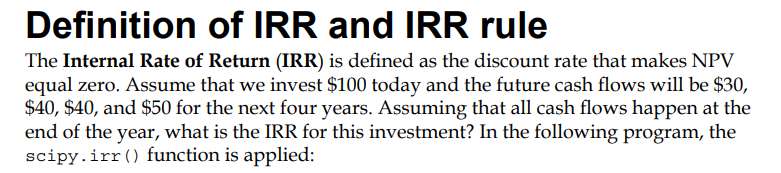

In [18]:
cashflows=[-100,30,40,40,50]
r = sp.irr(cashflows)
r

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.irr is deprecated and will be removed in SciPy 2.0.0, use numpy.irr instead
  


0.2001879105140867

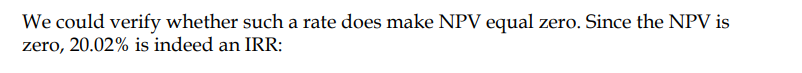

In [19]:
sp.npv(r,cashflows)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  """Entry point for launching an IPython kernel.


1.7763568394002505e-14

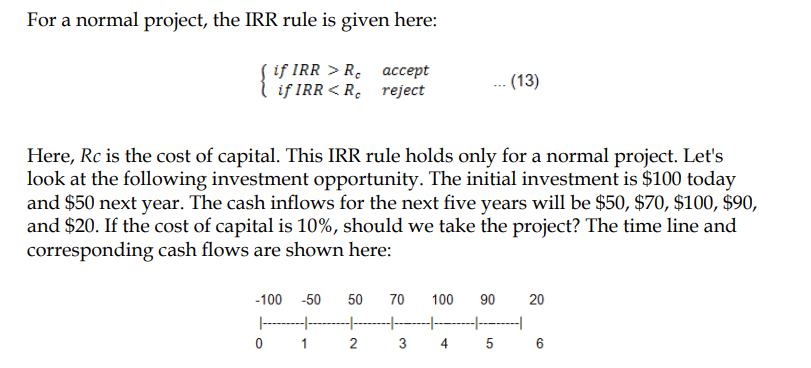

In [20]:
cashflows=[-100,-50,50,70,100,90,20]
sp.irr(cashflows)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.irr is deprecated and will be removed in SciPy 2.0.0, use numpy.irr instead
  


0.2594991932607331

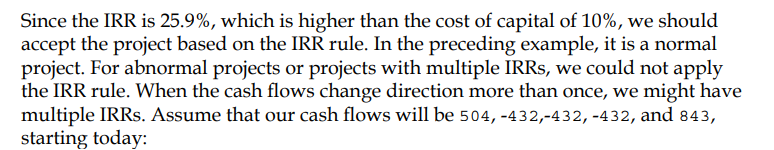

In [21]:
cashflows=[504, -432,-432, -432,843]
sp.irr(cashflows)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.irr is deprecated and will be removed in SciPy 2.0.0, use numpy.irr instead
  


0.14277225152187745

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  import sys


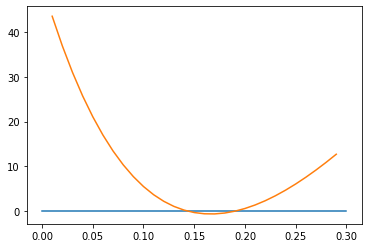

In [22]:
rate=[]
npv=[]
x=[0,0.3]
y=[0,0]

for i in range(1,30):
    rate.append(0.01*i)
    npv.append(sp.npv(0.01*i,cashflows))

plt.plot(x,y)
plt.plot(rate,npv)
plt.show()

Since the direction of our cash flows changes twice, the project might have two different IRRs.

Using the `spicy.npv()` function, we only got one IRR. From the following code , we could get both IRRs

In [27]:
import numpy as np
cashflows=[504, -432,-432, -432,843]
n=1000
n_cashflow=len(cashflows)
epsilon=sp.abs(np.mean(cashflows))*0.01

irr=[-99.00]

lag_sign=np.sign(np.npv(0,cashflows))

i=1
j=1

while(i<=n):
    interest=i*0.001
    s=np.sign(np.npv(interest,cashflows))
    i=i+1
    if s*lag_sign<0:
        lag_sign=s
        if j==1:
            irr=[interest]
            j=2
        else:
            irr.append(interest)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  app.launch_new_instance()


In [28]:
irr

[0.14300000000000002, 0.192]

### Definition of payback period and payback period rule

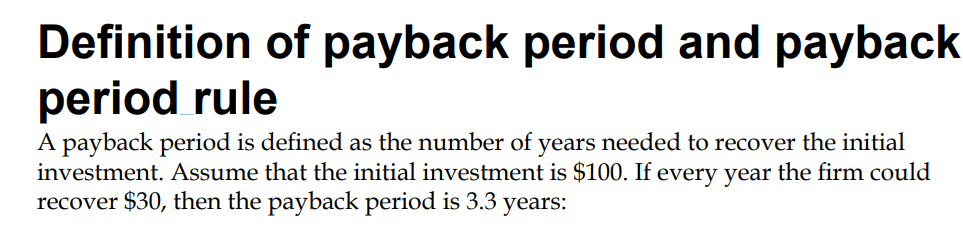

In [3]:
cashflows=[-100,30,30,30,30,30]

payback = 100/30
payback

3.3333333333333335

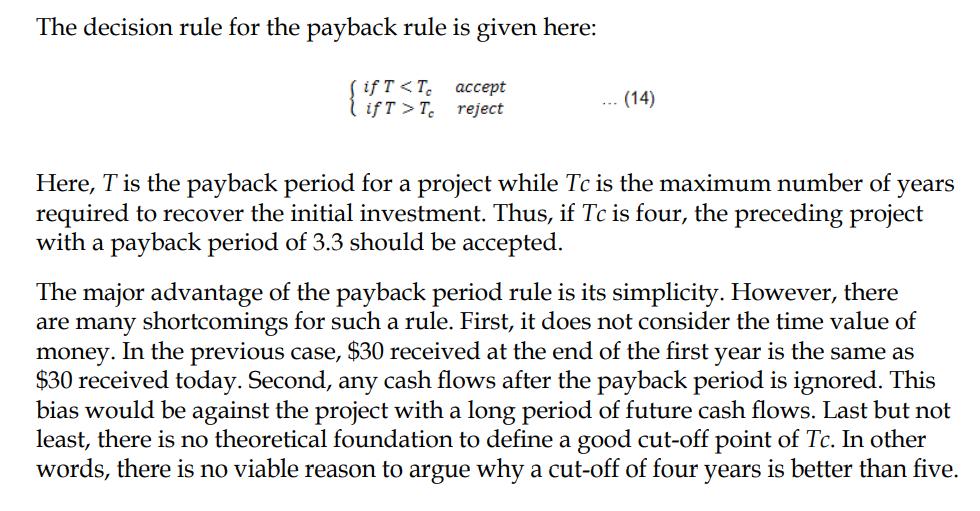

### Writing own financial calculator

In [4]:
# let's write our simplest financial calculator.

def pvFunction(fv,r,n):
    return fv/(1+r)**n
def pvPerpetuity(c,r):
    return c/r
def pvPerpetuityDue(c,r):
    return c/r*(1+r)

For simplicity, each function of the preceding three functions has just two lines. After
activating those functions by running the whole program, the `dir()` function could
be used to show their existence:

In [6]:
print(dir())

['In', 'Out', '_', '_1', '_2', '_3', '_5', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_ih', '_ii', '_iii', '_oh', 'cashflows', 'exit', 'get_ipython', 'payback', 'pvFunction', 'pvPerpetuity', 'pvPerpetuityDue', 'quit']


In [8]:
pvFunction(100,0.1,1)

90.9090909090909

In [9]:
pvFunction(n=1,r=0.1,fv=100)

90.9090909090909

In [10]:
pvFunction(n=1,fv=100,r=0.1)

90.9090909090909

In [11]:
def pvGrowingAnnuity(c,r,n,g):
    return c/(r-g)*(1-(1+g)**n/(1+r)**n)

def fvFunction(pv,r,n):
    return pv*(1+r)**n

def fvAnnuity(cv,r,n):
    return c/r*((1+r)**n-1)

def fvAnnuityDue(cv,r,n):
    return c/r*((1+r)**n-1)*(1+r)

def fvGrowingAnnuity(cv,r,n):
    return c/(r-g)*((1+r)**n-(1+g)*n)

Above functions are saved in `fincal.py`.

The following program would generate an executable filed called `fincal.cpython-35.pyc`:

In [13]:
import py_compile
py_compile.compile('fincal.py')

'__pycache__\\fincal.cpython-37.pyc'

`pyc` is a byte file

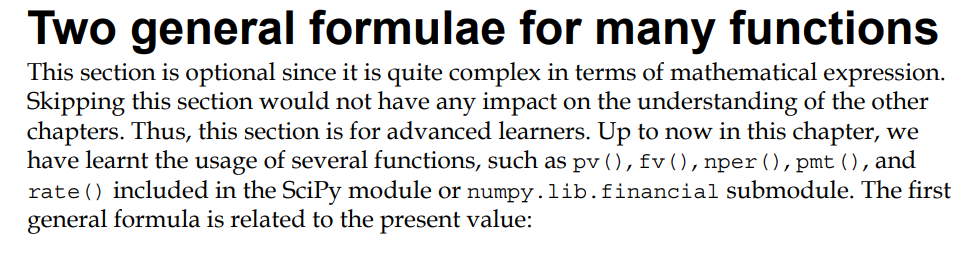

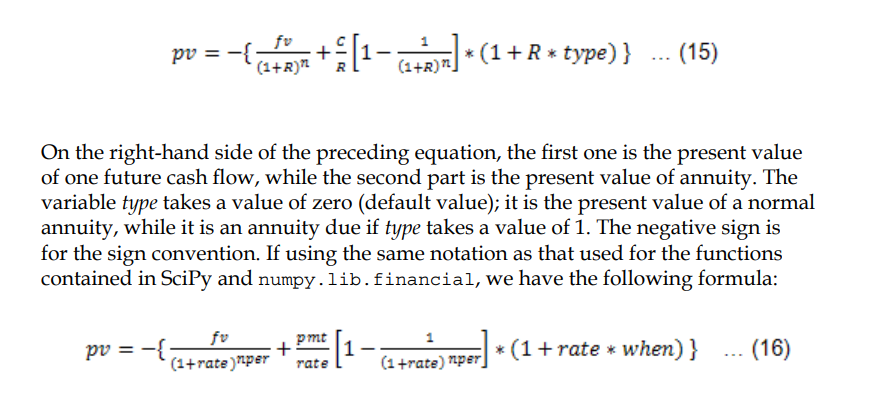

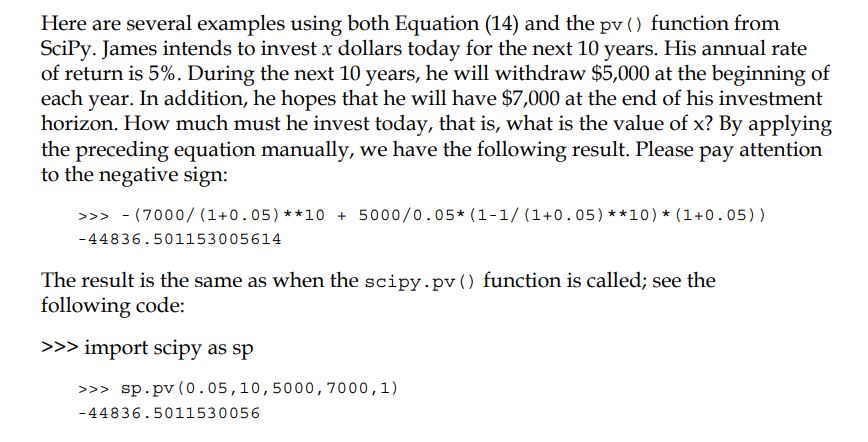

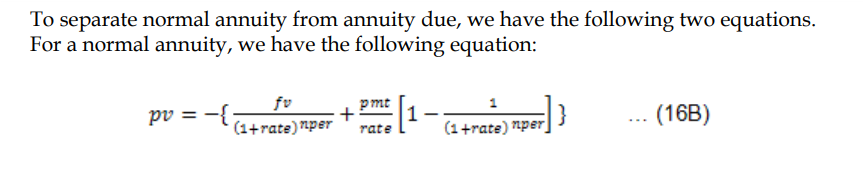

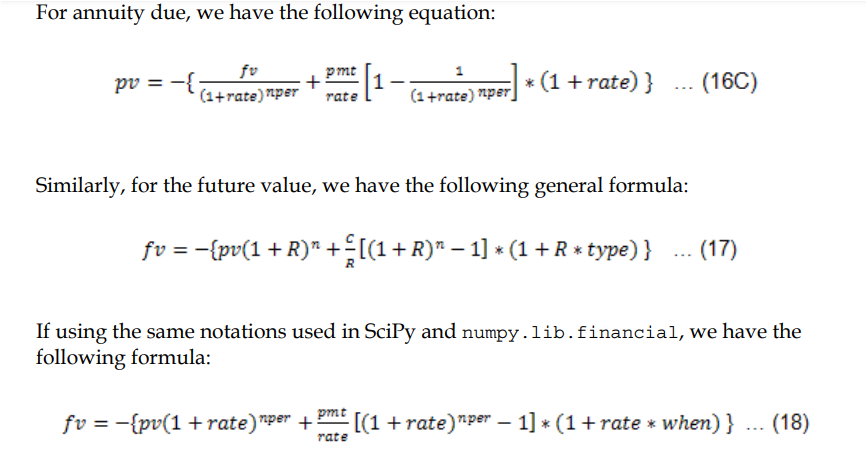

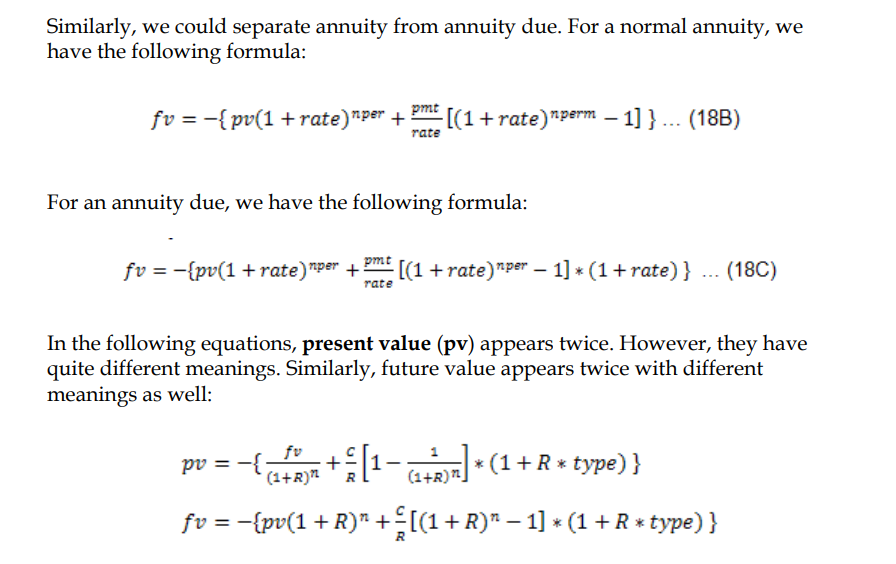

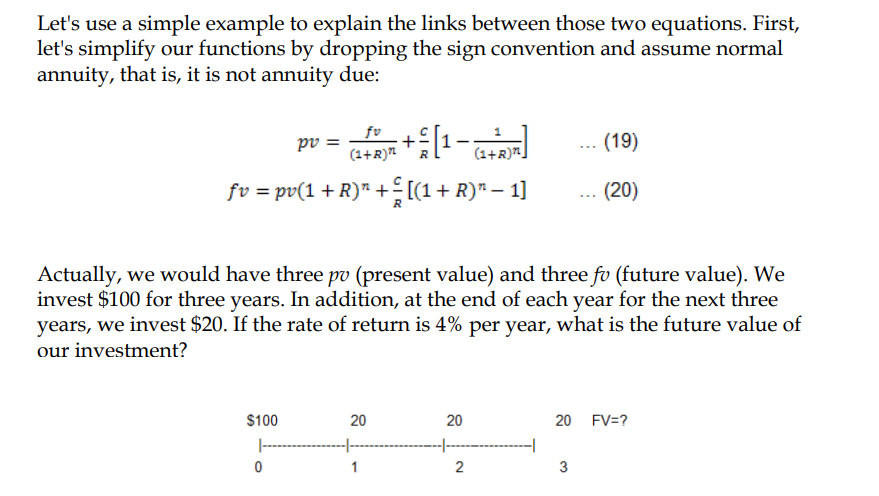

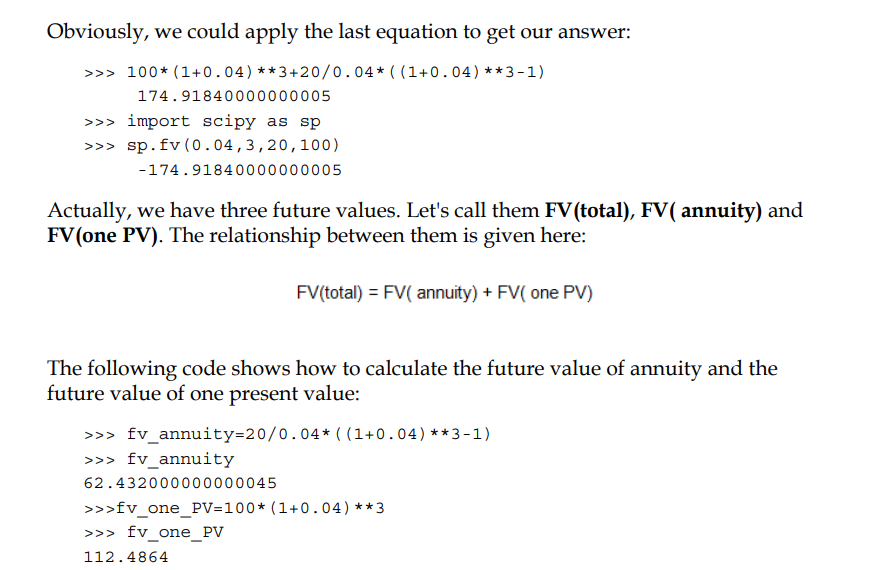

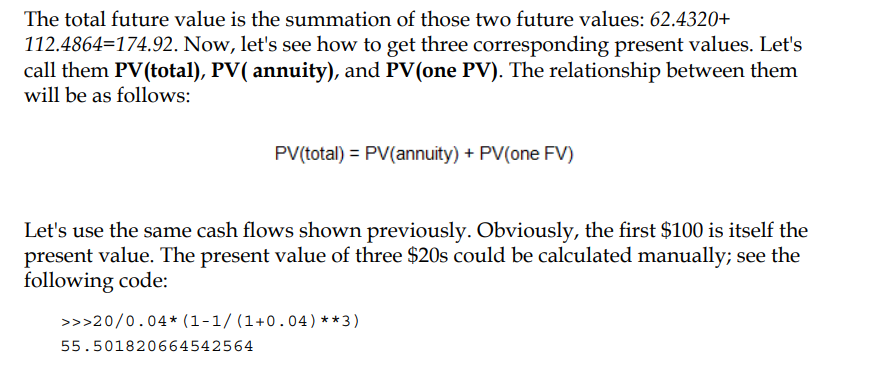

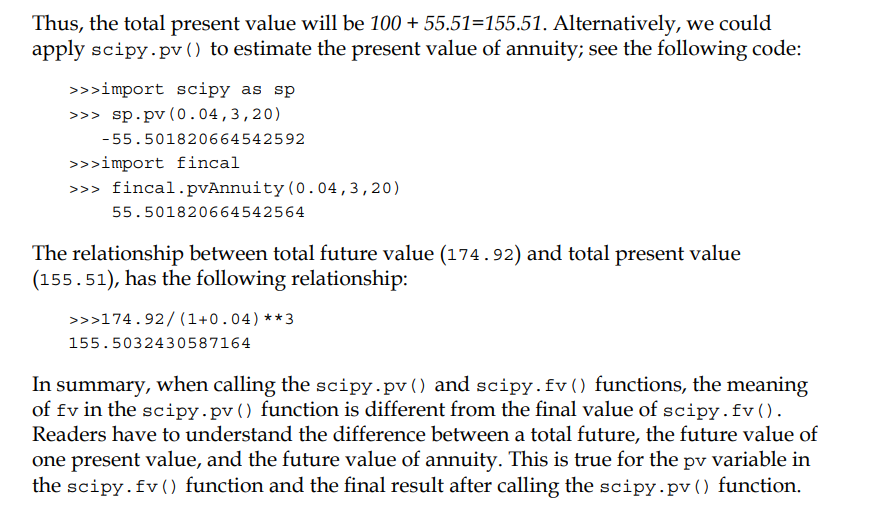

### Summary

In this file, many basic concepts related to finance were introduced, such as

* present value of one future cash flow, 
* present value of perpetuity, 
* present value of annuity, 
* future value of one cash flow/annuity, and 
* the concept of present of annuity due. 

The several decision rules were discussed in detail, such as the 
* NPV rule, 
* IRR rule, and 
* payback period rule. 

For the next file, we will discuss how to retrieve data associated with 
* economics, 
* finance, and 
* accounting 

from several open sources such as
* Yahoo!Finance, 
* Google finance,
* Prof. French's data library, and
* Federal Research's economic data library.